In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Heart.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
df.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Data Cleaning

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
df[df == "?"].count()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
num           0
dtype: int64

In [7]:
df_q = df.replace("?", np.nan)

In [8]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       720 non-null    int64 
 1   sex       720 non-null    int64 
 2   cp        720 non-null    int64 
 3   trestbps  717 non-null    object
 4   chol      697 non-null    object
 5   fbs       637 non-null    object
 6   restecg   718 non-null    object
 7   thalach   718 non-null    object
 8   exang     718 non-null    object
 9   oldpeak   714 non-null    object
 10  slope     513 non-null    object
 11  ca        307 non-null    object
 12  thal      400 non-null    object
 13  num       720 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 78.9+ KB


In [9]:
cols = ["trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
df_q[cols] = df_q[cols].astype(float)

In [10]:
df = df_q.replace(np.nan, df_q.mean())

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Histogram

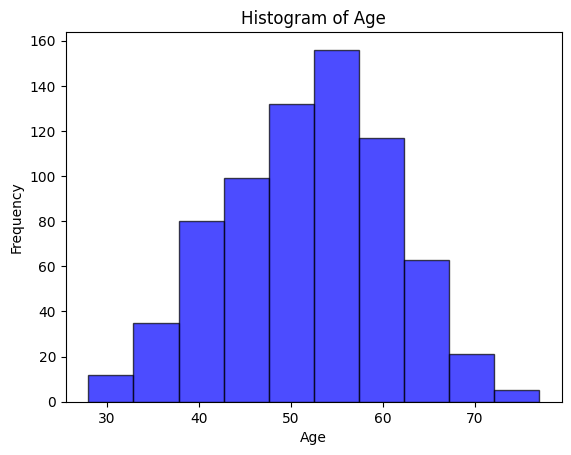

In [12]:
plt.hist(df['age'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

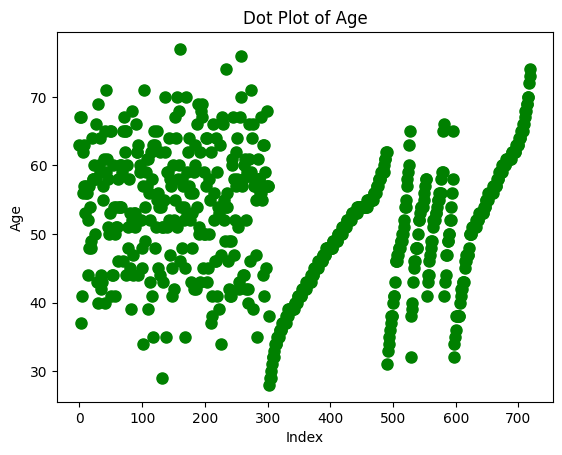

In [13]:
plt.plot(df['age'], marker='o', linestyle='', markersize=8, color='green')
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Dot Plot of Age')
plt.show()

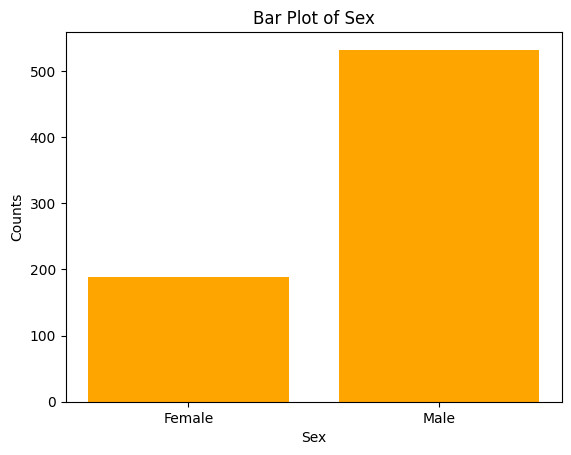

In [14]:
plt.bar(df['sex'].unique(), df['sex'].value_counts(), color='orange')
plt.xticks([0,1], ['Female'])
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.title('Bar Plot of Sex')
plt.show()

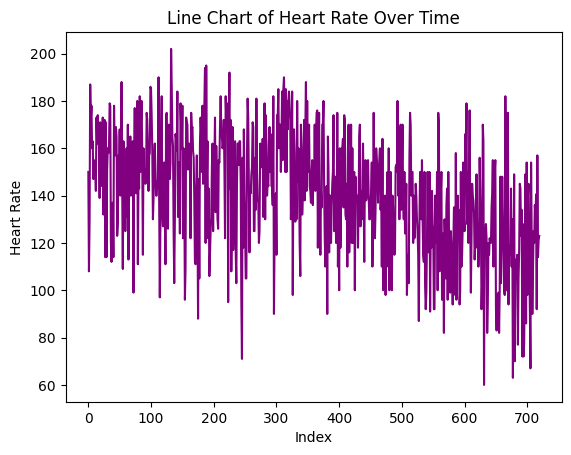

In [15]:
plt.plot(df['thalach'], linestyle='-', color='purple')
plt.xlabel('Index')
plt.ylabel('Heart Rate')
plt.title('Line Chart of Heart Rate Over Time')
plt.show()

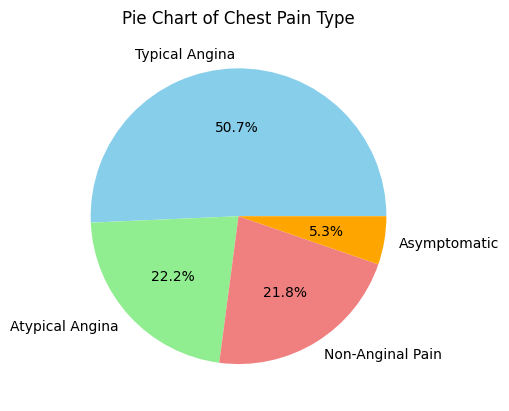

In [16]:
sizes = df['cp'].value_counts()
labels = ["Typical Angina","Atypical Angina","Non-Anginal Pain","Asymptomatic"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Pie Chart of Chest Pain Type')
plt.show()

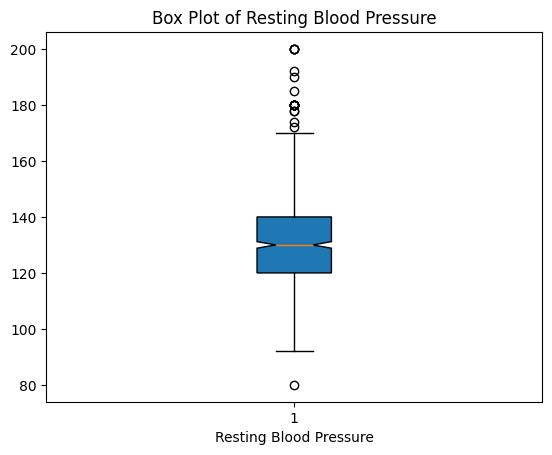

In [25]:
plt.boxplot(df['trestbps'], notch=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Resting Blood Pressure')
plt.title('Box Plot of Resting Blood Pressure')
plt.show()

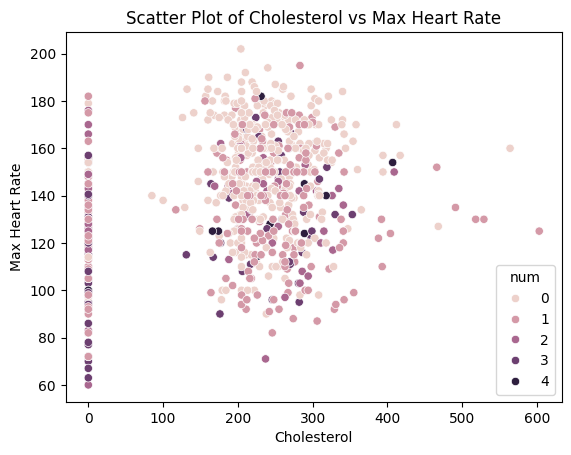

In [18]:
# plt.scatter(df['chol'], df['thalach'], s=20, c='red', marker='o', alpha=0.5)
sns.scatterplot(x='chol', y='thalach', data=df, hue='num')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.title('Scatter Plot of Cholesterol vs Max Heart Rate')
plt.show()

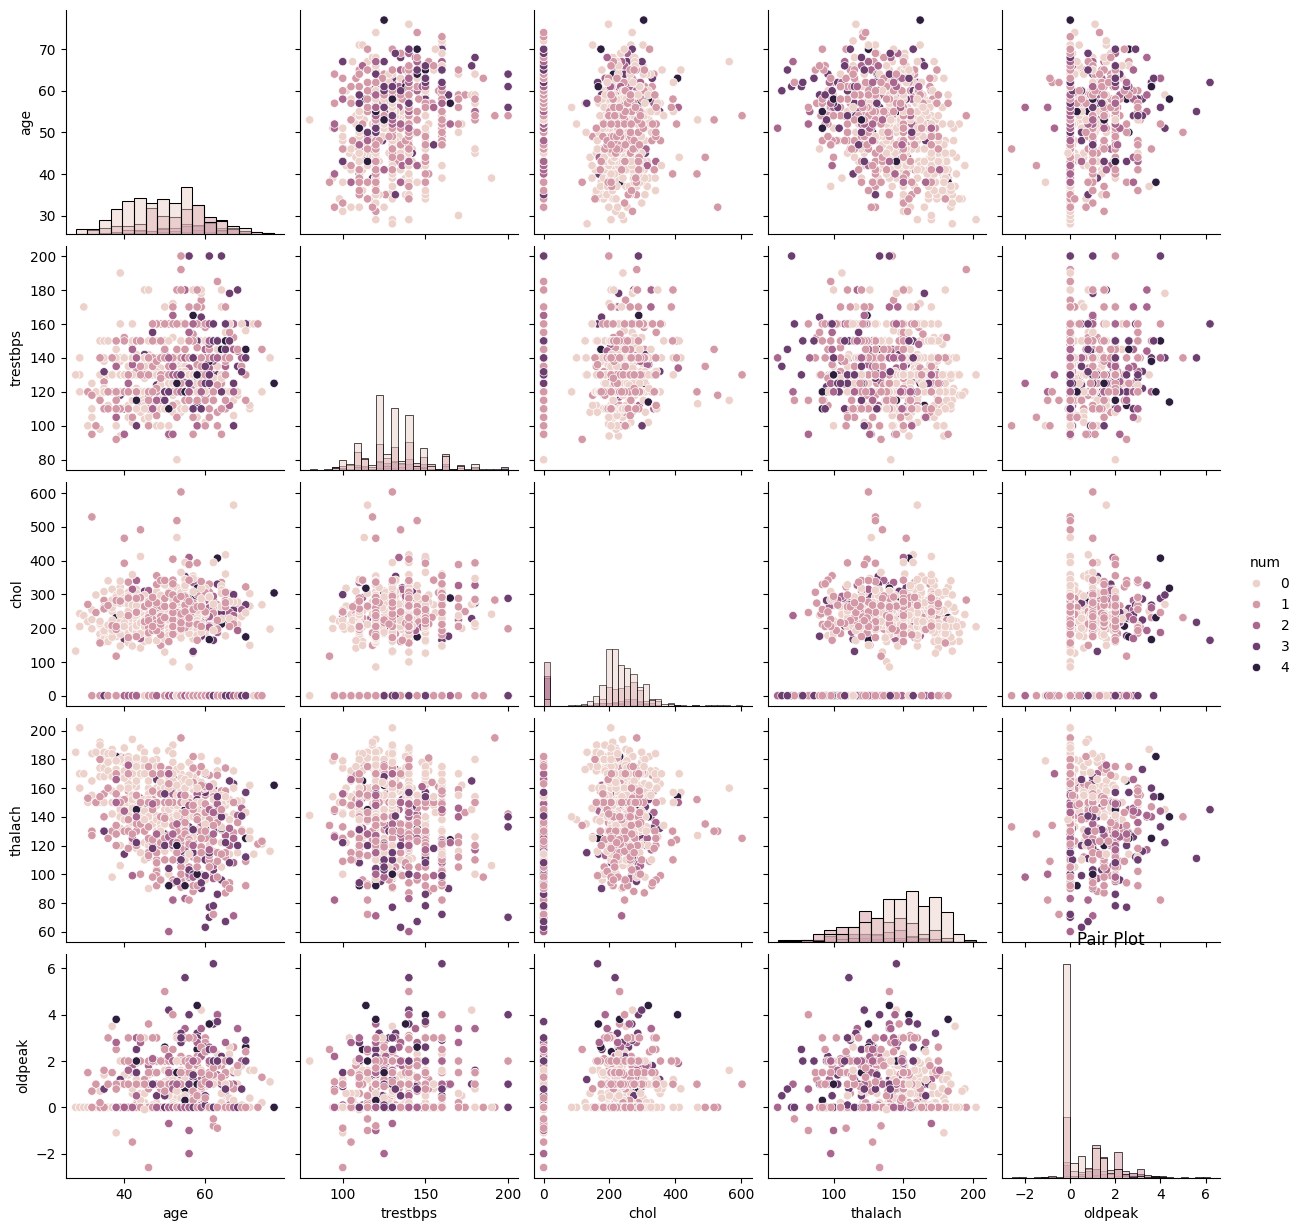

In [19]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']], hue='num', diag_kind='hist', kind='scatter')
plt.title('Pair Plot')
plt.show()

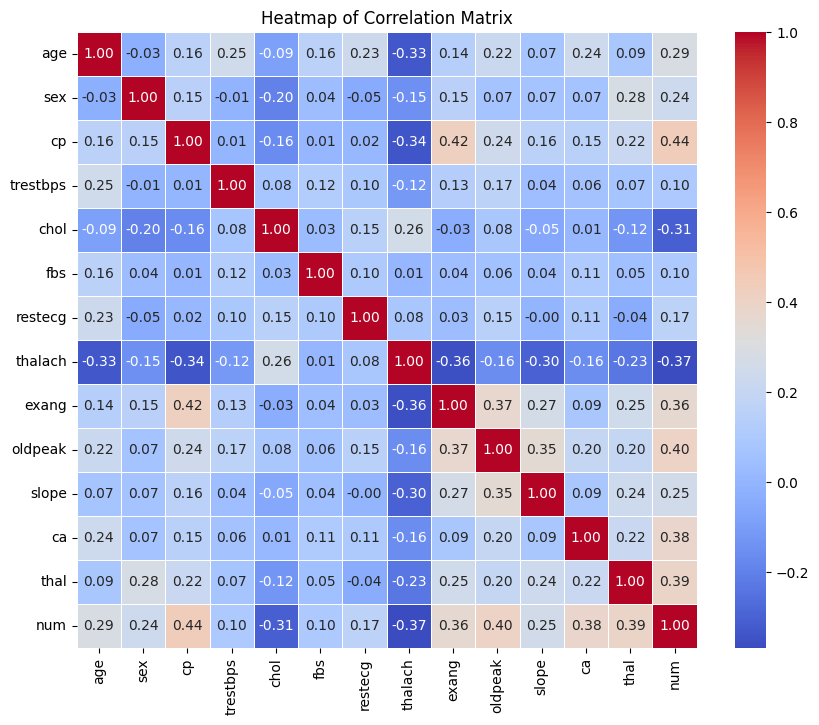

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Box Plot of Cholesterol on Scatter Plot')

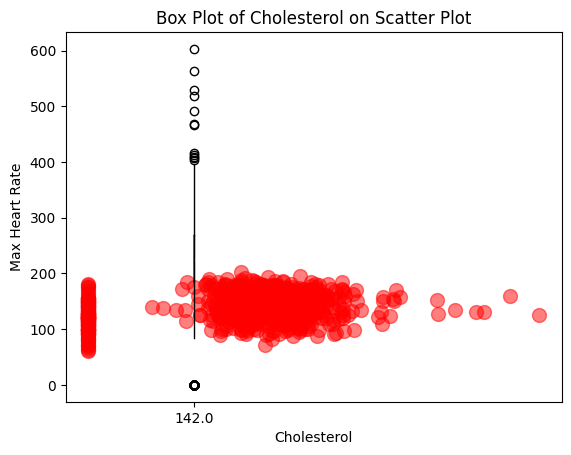

In [21]:
plt.boxplot(df['chol'], positions=[df['thalach'].median()], notch=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'), widths=0.5)
plt.scatter(df['chol'], df['thalach'], s=100, c='red', marker='o', alpha=0.5)
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.title('Box Plot of Cholesterol on Scatter Plot')

In [22]:
h = plt.scatterhist(df['chol'], df['thalach'], s=100, c='red', marker='o', alpha=0.5)

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterhist'

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Box plot on top of scatter plot and histogram
sns.boxplot(data=df, x='chol', ax=ax, color='lightgreen', width=0.1, linewidth=2, boxprops=dict(facecolor='none'))

# Scatter plot
# sns.scatterplot(data=df, x='chol', y='thalach', ax=ax, color='red', alpha=0.5)

# Histogram on top of scatter plot
# sns.histplot(data=df, x='chol', ax=ax, color='skyblue', kde=True, stat='density')

# Set labels and title
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Max Heart Rate')
ax.set_title('Scatter Plot with Histogram and Box Plot')

# Show the plot
plt.show()